In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control as ct
import os

PATH = os.getcwd()
PATH

'/home/andre/Documents/Git/CONTROLE_DCA3701.X/U3'

# Q1

![Q1](./lista_q1.jpg)

In [119]:
A = np.array([
    [0,1,0],
    [0,0,1],
    [-1,-5,-6]
])

B = np.array([
    [0],
    [1],
    [1]
])

C = np.array([
    [1,0,0]
])

Pc = np.array([-1 + 4j, -1 - 4j, -10], dtype=np.complex64)

* Polinômio característico:
<br>

1. $\Delta (s) = (s-(-1+j4)) \cdot (s) = (s-(-1-j4)) \cdot (s-(-10))$
2. $\Delta (s) = (s+1-j4) \cdot (s+1+j4) \cdot (s+10)$
3. $\Delta (s) = (s^2 +2s + 17)\cdot(s+10)$
4. $\Delta (s) = s^3 + 12s^2 + 37s + 170$

* Usando o metódo de Ackermann

In [120]:
qc = np.linalg.matrix_power(A, 3) + 12*np.linalg.matrix_power(A, 2) + 37*A + 170*np.eye(3)
print(qc)

[[169.  32.   6.]
 [ -6. 139.  -4.]
 [  4.  14. 163.]]


In [121]:
U = np.concatenate((B, A@B, np.linalg.matrix_power(A, 2)@B), axis=1)
print(U)

U_inversa = np.linalg.inv(U)
print(U_inversa)

[[  0   1   1]
 [  1   1 -11]
 [  1 -11  60]]
[[ 0.73493976  0.85542169  0.14457831]
 [ 0.85542169  0.01204819 -0.01204819]
 [ 0.14457831 -0.01204819  0.01204819]]


In [122]:
K =  -np.array([0,0,1]) @ U_inversa @ qc
print(K)

K = -ct.acker(A,B,Pc)
print(K)

[-24.55421687  -3.12048193  -2.87951807]
[[-24.55421687  -3.12048193  -2.87951807]]


* Realimentação de estado

![Realimentacao](./realimentacao_de_estado.jpg)

In [123]:
Aa = np.array([
    A + B@K
]).reshape(3,3)

Ba = np.array(B)
Ca = np.array(C)

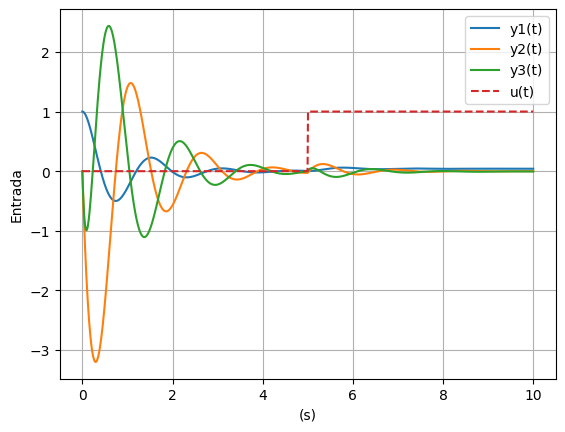

In [124]:
x0 = np.array(Ca)

lent = 1000
t = np.linspace(0,10, lent)
u = np.ones(lent)

u[0:int(lent/2)] = 0

system = signal.StateSpace(Aa, Ba, Ca, 0)
_, X,Y = signal.lsim(system, u, t, x0)

y1 = np.zeros(lent)
y2 = np.zeros(lent)
y3 = np.zeros(lent)

for i in range(lent):
    y1[i] = Y[i][0]
    y2[i] = Y[i][1]
    y3[i] = Y[i][2]

plt.plot(t, y1, label='y1(t)')
plt.plot(t, y2, label='y2(t)')
plt.plot(t, y3, label='y3(t)')
plt.plot(t, u, label='u(t)', linestyle='--')

plt.legend()
plt.grid()

plt.xlabel('(s)')
plt.ylabel('Entrada')

plt.savefig("grafico_q1.png")

plt.show()